In [ ]:
# KNN approach

In [ ]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./Website Phishing.csv
./.config/active_config
./.config/config_sentinel
./.config/default_configs.db
./.config/.last_update_check.json
./.config/.last_opt_in_prompt.yaml
./.config/.last_survey_prompt.yaml
./.config/gce
./.config/logs/2023.11.20/14.38.59.765323.log
./.config/logs/2023.11.20/14.36.05.894714.log
./.config/logs/2023.11.20/14.42.08.245434.log
./.config/logs/2023.11.20/14.39.09.166199.log
./.config/logs/2023.11.20/14.42.07.513397.log
./.config/logs/2023.11.20/14.41.57.822879.log
./.config/configurations/config_default
./sample_data/README.md
./sample_data/anscombe.json
./sample_data/mnist_train_small.csv
./sample_data/california_housing_test.csv
./sample_data/california_housing_train.csv
./sample_data/mnist_test.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Preprocessing
data = pd.read_csv("/content/Website Phishing.csv")
data.head(5)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
a=len(data[data.Result==0])
b=len(data[data.Result==-1])
c=len(data[data.Result==1])
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  702
Count of Suspicious Websites =  103
Count of Phishy Websites =  548


array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

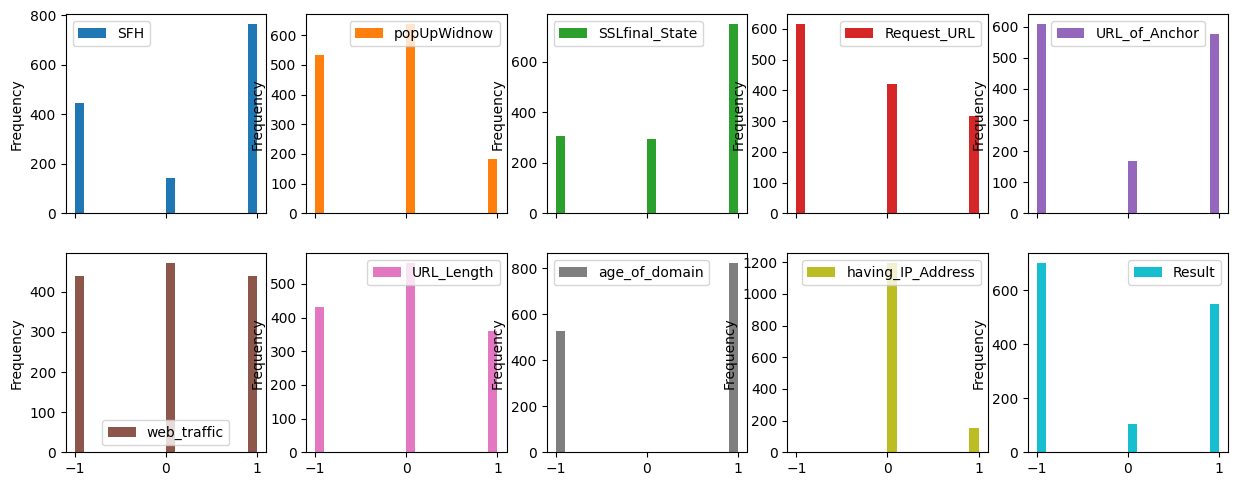

In [ ]:
data.plot.hist(subplots=True, layout=(5,5), figsize=(15, 15), bins=20)

In [ ]:
x=data.drop("Request_URL", axis=1)
y=data["Request_URL"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=60)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([-1,  0, -1, -1,  0,  0, -1, -1,  0,  1, -1,  0, -1, -1,  0, -1,  1,
        0, -1,  0,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  1,  0, -1,  0,
       -1, -1,  0, -1, -1,  1, -1,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  1, -1,  1, -1,
        1, -1,  0,  0, -1, -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1,  1,  1,
       -1,  0, -1, -1,  0,  0,  0,  0, -1,  1,  0,  0, -1,  1, -1, -1,  0,
        1,  0, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1,  1, -1,  0,  0, -1,
       -1,  0,  1, -1,  0, -1,  0, -1,  0,  0, -1,  0, -1,  0,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1,  0, -1,  0, -1, -1, -1, -1,  0,  0,
       -1, -1,  1, -1,  0,  1, -1,  0,  0, -1,  1, -1,  0,  0, -1, -1, -1,
       -1,  0,  1, -1,  1,  0,  1,  1,  0,  0,  0, -1, -1, -1, -1, -1, -1,
        0,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  1,
       -1,  0, -1, -1, -1

<Axes: >

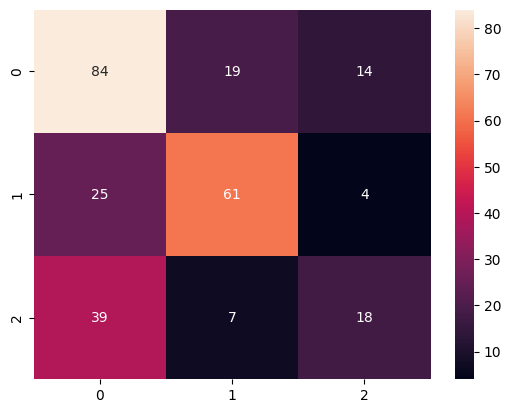

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
predic = knn.predict(x_test)
print("F1 score:",f1_score(y_test, predic,average='weighted'))
print("Accuracy:", accuracy_score(y_test, predic) * 100, "%")

F1 score: 0.5876290893385429
Accuracy: 60.147601476014756 %


In [ ]:
print(knn.predict(sc.transform([[0,1,1,1,1,1,-1,0,1]])))

[-1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Decision Tree approach

In [ ]:
x = data.drop('Result',axis=1).values
y = data['Result'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 1082 samples.
Testing set has 271 samples.


In [ ]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model = model_tree.fit(x_train, y_train)
features = ('SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',	'web_traffic',	'URL_Length',	'age_of_domain',	'having_IP_Address')
name = ('Phishing', 'Suspicious', 'Legitimate')

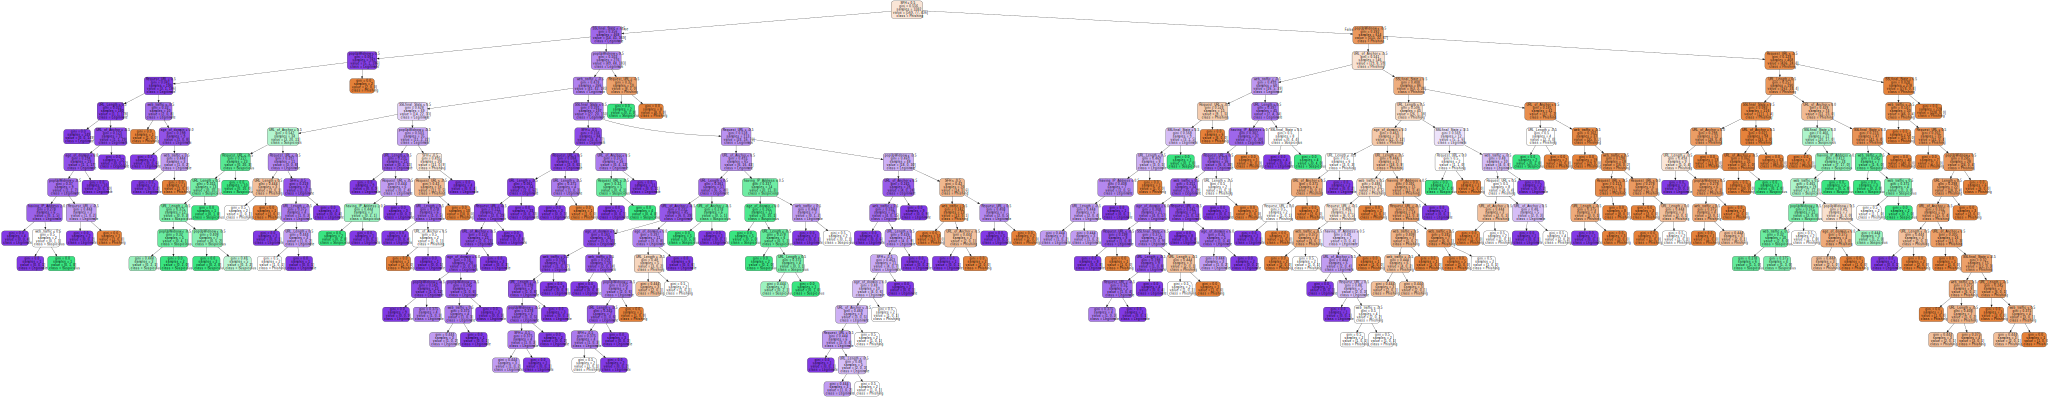

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names = features, class_names =  name,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

<Axes: >

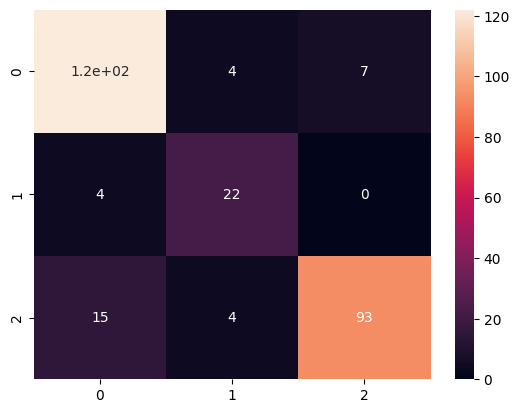

In [ ]:
from sklearn.metrics import matthews_corrcoef
predictions = model.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
c=confusion_matrix(y_test,predictions)

sns.heatmap(c, annot=True)

In [ ]:
print("F1 score",f1_score(y_test,predictions,average='weighted'))
print("Accuracy:",100 *accuracy_score(y_test,predictions))

F1 score 0.8750209541562628
Accuracy: 87.4538745387454


In [ ]:
# Naive Bayes

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total",x_test.shape[0],"points:", (y_test != y_pred).sum())

Number of mislabeled points out of a total 271 points: 50


<Axes: >

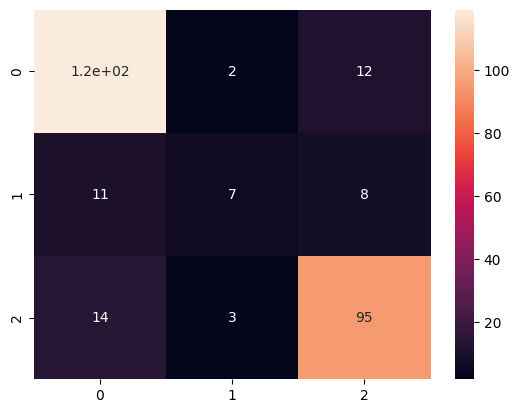

In [ ]:
from sklearn.metrics import matthews_corrcoef
predictions = model.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
c=confusion_matrix(y_test,y_pred)

sns.heatmap(c, annot=True)

In [ ]:
print("F1 score",f1_score(y_test,y_pred,average='weighted'))
print("Accuracy:",100 *accuracy_score(y_test,y_pred))

F1 score 0.8029439446182232
Accuracy: 81.54981549815497
